**LOADING LIBRARIES**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats as st

**LOADING DATASETS**

In [2]:
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

**INITIAL REVIEW OF DATASET**

**calls**

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
calls.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [5]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


- Dataframe has 137,735 entries.
- There are no missing values.
- call_date column has incorrect data type: it is string but it should be datetime.

**internet**

In [6]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [7]:
internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [8]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


- Dataframe has 104,825 entries.
- There are no missing values.
- sesion_date column has incorrect data type: it is string but it should be datetime.

**messages**

In [9]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [10]:
messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [11]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


- Dataframe has 76,051 entries.
- There are no missing values.
- message_date column has incorrect data type: it is string but it should be datetime.

**plans**

In [12]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [13]:
plans.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [14]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


- Dataframe has 2 entries.
- There are no missing values.

**users**

In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [16]:
users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [17]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


- Dataframe has 500 entries.
- There are missing values: churn_date.
- reg_date column has incorrect data type: it is string but it should be datetime.
- churn_date column has incorrect data type: it is string but it should be datetime.

**PRE-EXPLORATORY ANALYSIS**

**Data types**

In [18]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

#For convenience, we will not treat NaN values in churn_date column

**ENRICHMENT OF DATASET**

**calls**

In [19]:
calls['month'] = calls['call_date'].dt.month_name()

In [20]:
def round_up_positive(value):
    rounded_value = math.ceil(value)
    return max(rounded_value, 1)  # Ensure the rounded value is at least 1

# Apply the function to the desired column
calls['charged_minutes'] = calls['duration'].apply(round_up_positive)

In [21]:
calls.head()

,id,user_id,call_date,duration,month,charged_minutes
0,1000_93,1000,2018-12-27,8.52,December,9
1,1000_145,1000,2018-12-27,13.66,December,14
2,1000_247,1000,2018-12-27,14.48,December,15
3,1000_309,1000,2018-12-28,5.76,December,6
4,1000_380,1000,2018-12-30,4.22,December,5


In [22]:
calls_per_month = calls.groupby(['user_id', 'month'])['charged_minutes'].sum().reset_index()
calls_per_month

,user_id,month,charged_minutes
0,1000,December,124
1,1001,August,187
2,1001,December,422
3,1001,November,441
4,1001,October,411
...,...,...,...
2253,1498,September,369
2254,1499,December,505
2255,1499,November,314
2256,1499,October,397


**internet**

In [23]:
internet['month'] = internet['session_date'].dt.month_name()

In [24]:
internet.rename(columns={'mb_used': 'gb_used'}, inplace=True)

In [25]:
internet['gb_used'] = internet['gb_used'] / 1024.0

In [26]:
internet.head()

,id,user_id,session_date,gb_used,month
0,1000_13,1000,2018-12-29,0.087754,December
1,1000_204,1000,2018-12-31,0.000000,December
2,1000_379,1000,2018-12-28,0.644922,December
3,1000_413,1000,2018-12-26,0.264639,December
4,1000_442,1000,2018-12-27,0.859590,December


In [27]:
internet_per_month = internet.groupby(['user_id', 'month'])['gb_used'].sum().reset_index()
internet_per_month

,user_id,month,gb_used
0,1000,December,1.856904
1,1001,August,6.756982
2,1001,December,18.915215
3,1001,November,18.070605
4,1001,October,21.807119
...,...,...,...
2272,1498,September,22.292266
2273,1499,December,21.542197
2274,1499,November,16.419756
2275,1499,October,19.035576


**messages**

In [28]:
messages['month'] = messages['message_date'].dt.month_name()
messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,December
1,1000_160,1000,2018-12-31,December
2,1000_223,1000,2018-12-31,December
3,1000_251,1000,2018-12-27,December
4,1000_255,1000,2018-12-26,December


In [29]:
messages_per_month = messages.groupby(['user_id', 'month'])['message_date'].count().reset_index()
messages_per_month

,user_id,month,message_date
0,1000,December,11
1,1001,August,30
2,1001,December,44
3,1001,November,36
4,1001,October,53
...,...,...,...
1801,1496,December,11
1802,1496,November,13
1803,1496,October,18
1804,1496,September,21


we are going to merge all datasets, to keep all data in one table.

In [30]:
d1 = pd.merge(internet_per_month, calls_per_month, on=['user_id', 'month'], how='left')
d1

,user_id,month,gb_used,charged_minutes
0,1000,December,1.856904,124.0
1,1001,August,6.756982,187.0
2,1001,December,18.915215,422.0
3,1001,November,18.070605,441.0
4,1001,October,21.807119,411.0
...,...,...,...,...
2272,1498,September,22.292266,369.0
2273,1499,December,21.542197,505.0
2274,1499,November,16.419756,314.0
2275,1499,October,19.035576,397.0


In [31]:
d2 = pd.merge(d1, messages_per_month, on=['user_id', 'month'], how='left')
d2

,user_id,month,gb_used,charged_minutes,message_date
0,1000,December,1.856904,124.0,11.0
1,1001,August,6.756982,187.0,30.0
2,1001,December,18.915215,422.0,44.0
3,1001,November,18.070605,441.0,36.0
4,1001,October,21.807119,411.0,53.0
...,...,...,...,...,...
2272,1498,September,22.292266,369.0,NaN
2273,1499,December,21.542197,505.0,NaN
2274,1499,November,16.419756,314.0,NaN
2275,1499,October,19.035576,397.0,NaN


In [32]:
user_stats = users[['user_id', 'plan', 'city']]
user_stats

,user_id,plan,city
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,surf,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,surf,"Tulsa, OK MSA"
4,1004,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...
495,1495,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"
496,1496,surf,"New Orleans-Metairie, LA MSA"
497,1497,ultimate,"Los Angeles-Long Beach-Anaheim, CA MSA"
498,1498,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"


In [33]:
final_user_stats = pd.merge(d2, user_stats, on=['user_id'], how='left')
final_user_stats

,user_id,month,gb_used,charged_minutes,message_date,plan,city
0,1000,December,1.856904,124.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,August,6.756982,187.0,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,December,18.915215,422.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,November,18.070605,441.0,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,October,21.807119,411.0,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...
2272,1498,September,22.292266,369.0,NaN,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2273,1499,December,21.542197,505.0,NaN,surf,"Orlando-Kissimmee-Sanford, FL MSA"
2274,1499,November,16.419756,314.0,NaN,surf,"Orlando-Kissimmee-Sanford, FL MSA"
2275,1499,October,19.035576,397.0,NaN,surf,"Orlando-Kissimmee-Sanford, FL MSA"


In [34]:
final_user_stats.rename(columns={'message_date': 'message_count'}, inplace=True)
final_user_stats

,user_id,month,gb_used,charged_minutes,message_count,plan,city
0,1000,December,1.856904,124.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,August,6.756982,187.0,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,December,18.915215,422.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,November,18.070605,441.0,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,October,21.807119,411.0,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...
2272,1498,September,22.292266,369.0,NaN,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2273,1499,December,21.542197,505.0,NaN,surf,"Orlando-Kissimmee-Sanford, FL MSA"
2274,1499,November,16.419756,314.0,NaN,surf,"Orlando-Kissimmee-Sanford, FL MSA"
2275,1499,October,19.035576,397.0,NaN,surf,"Orlando-Kissimmee-Sanford, FL MSA"


In [35]:
def monthly_profit(row):
    
    if row['plan'] == 'surf':
       
        min_dif = 0
        mes_dif = 0
        gb_dif = 0
        
        if row['charged_minutes'] > 500:
            min_dif = row['charged_minutes'] - 500
        if row['message_count'] > 50:
            mes_dif = row['message_count'] - 50
        if row['gb_used'] > 15:
            gb_dif = row['gb_used'] - 15
        
        profit = 20 + min_dif*0.03 + mes_dif*0.03 + + gb_dif*10
        
    if row['plan'] == 'ultimate':
       
        min_dif = 0
        mes_dif = 0
        gb_dif = 0
        
        if row['charged_minutes'] > 3000:
            min_dif = row['charged_minutes'] - 3000
        if row['message_count'] > 1000:
            mes_dif = row['message_count'] - 1000
        if row['gb_used'] > 30:
            gb_dif = row['gb_used'] - 30
        
        profit = 70 + min_dif*0.01 + mes_dif*0.01 + + gb_dif*7

    return profit

In [36]:
final_user_stats['profit'] = final_user_stats.apply(monthly_profit, axis=1)
final_user_stats.head()

,user_id,month,gb_used,charged_minutes,message_count,plan,city,profit
0,1000,December,1.856904,124.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",70.000000
1,1001,August,6.756982,187.0,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.000000
2,1001,December,18.915215,422.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",59.152148
3,1001,November,18.070605,441.0,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50.706055
4,1001,October,21.807119,411.0,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",88.161191


In [37]:
profits = final_user_stats.groupby('plan')['profit'].sum()
profits

plan
surf        90688.336738
ultimate    51853.577344
Name: profit, dtype: float64

**GRAPHIC ANALYSIS**

In [38]:
surf_data = final_user_stats.query('plan == "surf"')
surf_data

,user_id,month,gb_used,charged_minutes,message_count,plan,city,profit
1,1001,August,6.756982,187.0,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.000000
2,1001,December,18.915215,422.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",59.152148
3,1001,November,18.070605,441.0,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50.706055
4,1001,October,21.807119,411.0,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",88.161191
5,1001,September,13.002754,326.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.000000
...,...,...,...,...,...,...,...,...
2272,1498,September,22.292266,369.0,NaN,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",92.922656
2273,1499,December,21.542197,505.0,NaN,surf,"Orlando-Kissimmee-Sanford, FL MSA",85.571973
2274,1499,November,16.419756,314.0,NaN,surf,"Orlando-Kissimmee-Sanford, FL MSA",34.197559
2275,1499,October,19.035576,397.0,NaN,surf,"Orlando-Kissimmee-Sanford, FL MSA",60.355762


In [39]:
ultimate_data = final_user_stats.query('plan == "ultimate"')
ultimate_data

,user_id,month,gb_used,charged_minutes,message_count,plan,city,profit
0,1000,December,1.856904,124.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",70.000000
19,1006,December,31.366035,61.0,139.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",79.562246
20,1006,November,2.019893,10.0,15.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",70.000000
26,1008,December,14.345049,654.0,26.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",70.000000
27,1008,November,23.121797,459.0,37.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",70.000000
...,...,...,...,...,...,...,...,...
2242,1493,December,14.930752,479.0,NaN,ultimate,"Boston-Cambridge-Newton, MA-NH MSA",70.000000
2243,1493,November,15.264434,514.0,NaN,ultimate,"Boston-Cambridge-Newton, MA-NH MSA",70.000000
2244,1493,October,15.946846,464.0,NaN,ultimate,"Boston-Cambridge-Newton, MA-NH MSA",70.000000
2245,1493,September,14.639814,544.0,NaN,ultimate,"Boston-Cambridge-Newton, MA-NH MSA",70.000000


In [40]:
# to simplify, a funtion will be defined as a initial outlook using all data for a variable

def all_data_hist(variable):
    return variable.plot(kind='hist', bins=100) and variable.describe()

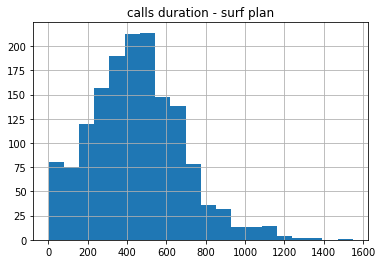

In [41]:
surf_data['charged_minutes'].hist(bins=20)
plt.title('calls duration - surf plan')
plt.show()

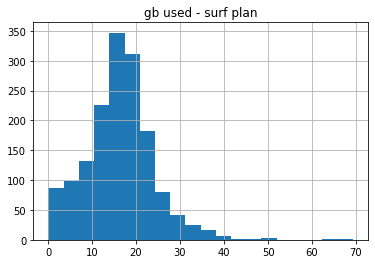

In [42]:
surf_data['gb_used'].hist(bins=20)
plt.title('gb used - surf plan')
plt.show()

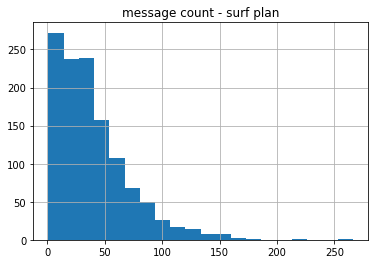

In [43]:
surf_data['message_count'].hist(bins=20)
plt.title('message count - surf plan')
plt.show()

**STATISTICAL HYPOTHESIS**

In [44]:
np.var(surf_data['profit'])

2921.9773281581997

In [45]:
np.var(ultimate_data['profit'])

115.96184411360676

The variances are very differents one to each other so, an hypothesis test will be made:

**1. AVERAGE PROFIT FOR EACH PLAN**

***Null hypothesis: Average profit of Surf plan is the same than average profit of Ultimate plan***

***Alternative hypothesis: Average profit of Surf plan is different than average profit of Ultimate plan***

In [46]:
alpha = 0.05

results = st.ttest_ind(ultimate_data['profit'], surf_data['profit'], equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We cannot ignore the null hypothesis')
else:
    print('We reject the null hypothesis')

p-value: 6.703912850180736e-22
We cannot ignore the null hypothesis


**2. AVERAGE PROFIT BETWEEN NEW YORK-NEW JERSEY AREA VS OTHER AREAS**

***Null hypothesis: Average profit of NY-NJ area is the same than average profit of other areas***

***Alternative hypothesis: Average profit of NY-NJ area is different than average profit of other areas***

In [47]:
def area(city):
    
    no_commas = city.split(",")
    
    for entry in no_commas:
        
        if ('NY-NJ' in entry) | (entry == "NY") | (entry == "NJ"):
            return 'ny-nj'

In [48]:
final_user_stats['area'] = final_user_stats['city'].apply(area)

In [49]:
final_user_stats['area'] = final_user_stats['area'].fillna('other')
final_user_stats['area'] = final_user_stats['area'].astype('category')
final_user_stats['area'].value_counts()

other    1901
ny-nj     376
Name: area, dtype: int64

In [50]:
ny_nj_area = final_user_stats.query('area == "ny-nj"')
ny_nj_area

,user_id,month,gb_used,charged_minutes,message_count,plan,city,profit,area
56,1014,December,7.609775,1139.0,64.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",39.590000,ny-nj
57,1014,November,1.148037,168.0,9.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",20.000000,ny-nj
75,1022,August,20.825518,642.0,NaN,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",82.515176,ny-nj
76,1022,December,17.855098,605.0,NaN,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",51.700977,ny-nj
77,1022,July,9.700342,489.0,NaN,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",20.000000,ny-nj
...,...,...,...,...,...,...,...,...,...
2268,1498,March,19.281582,274.0,NaN,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",62.815820,ny-nj
2269,1498,May,21.935713,294.0,NaN,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",89.357129,ny-nj
2270,1498,November,18.719287,235.0,NaN,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",57.192871,ny-nj
2271,1498,October,20.098398,307.0,NaN,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",70.983984,ny-nj


In [52]:
other_area = final_user_stats.query('area == "other"')
other_area

,user_id,month,gb_used,charged_minutes,message_count,plan,city,profit,area
0,1000,December,1.856904,124.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",70.000000,other
1,1001,August,6.756982,187.0,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.000000,other
2,1001,December,18.915215,422.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",59.152148,other
3,1001,November,18.070605,441.0,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50.706055,other
4,1001,October,21.807119,411.0,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",88.161191,other
...,...,...,...,...,...,...,...,...,...
2261,1497,December,10.846240,312.0,50.0,ultimate,"Los Angeles-Long Beach-Anaheim, CA MSA",70.000000,other
2273,1499,December,21.542197,505.0,NaN,surf,"Orlando-Kissimmee-Sanford, FL MSA",85.571973,other
2274,1499,November,16.419756,314.0,NaN,surf,"Orlando-Kissimmee-Sanford, FL MSA",34.197559,other
2275,1499,October,19.035576,397.0,NaN,surf,"Orlando-Kissimmee-Sanford, FL MSA",60.355762,other


In [53]:
alpha = 0.05
results = st.ttest_ind(ny_nj_area['profit'], other_area['profit'], equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('We cannot ignore the null hypothesis')
else:
    print('We reject the null hypothesis')

p-value: 0.014363914526396234
We cannot ignore the null hypothesis


**CONCLUSIONS:**

- The most profitable plan was the Surf plan.
- Statistically, average profit between surf plan and ultimate plan are the same.
- Statistically, average profit between ny-nj area and other areas are the same.